#vn.past.demo - Welcome!

---

### 1. Preface
past 是一个从属于vn.trader的市场历史数据解决方案模块。主要功能为：

* 从datayes（通联数据）等web数据源高效地爬取、更新历史数据。
* 基于MongoDB的数据库管理、快速查询，各种输出格式的转换。
* 基于Matplotlib快速绘制K线图等可视化对象。

**主要依赖**：pymongo，pandas，requests，json

**开发测试环境**：
* OS X 10.10 / Windows 7
* Anaconda.Python 2.7
---

### 2. Get Started

#### 2.1   使用前

安装MongoDB: https://www.mongodb.org/downloads


更新pymongo至3.0以上版本：


	~$ pip install pymongo --upgrade
    
    
安装或更新requests：

    ~$ pip install requests --upgrade
    
启动MongoDB：

    ~$ mongod

#### 2.2   首次使用
Demo中目前加载了使用通联数据Api下载股票日线数据和期货合约日线数据的方法。

首次使用时：

1. 用文本编辑器打开base.py，填写通联数据的用户token。

2. 执行init.py初始化MongoDB数据库。即下载全部股票与期货合约日线数据并储存至MongoDB。默认的初始化数据跨度为：股票从2013年1月1日至2015年7月20日；期货合约从2015年1月1日至2015年7月20日。各使用最大30个CPU线程。根据网速的不同，下载会花费大概8到15分钟。

---


In [84]:
# init.py

from base import *

if __name__ == '__main__':

    ds = DataGenerator()
    ds.download()

[DS]: MongoDB initialized.
[DS]: MongoDB index set.


### 3. Methods

#### 3.1 fetch
* DataGenerator.fetch( ticker, start, end, field=-1, output='list' )
    * ticker: 字符串, 股票或期货合约代码。
    * start, end: ‘yyyymmdd’ 格式字符串；查询时间起止点。
    * field: 字符串列表，所选取的key。默认值为－1，选取所有key。
    * output: 字符串，输出格式。默认为'list'，输出字典列表。可选的类型为：
        * 'list'： 输出字典列表。
        * 'df'： 输出pandas DataFrame。
        * 'bar'： 输出本模块内建的Bar数据结构，为一个包含日期，开、收、高、低价格以及成交量的DataFrame，之后详细介绍。注意若选择输出bar，则参数field的值会被忽略。
        
---

In [85]:
import time
start_time = time.time()

l = ds.fetch('000001','20150101','20150701',field=['closePrice','openPrice'],output='list') 
# 输出字典列表，股票代码为000001，选择closePrice和openPrice

print 'Finished in',time.time()-start_time,'seconds' # 查询时间(秒)
l[0:5]

Finished in 0.00310802459717 seconds


[{u'closePrice': 13.92,
  u'date': datetime.datetime(2015, 7, 1, 0, 0),
  u'openPrice': 14.35},
 {u'closePrice': 14.54,
  u'date': datetime.datetime(2015, 6, 30, 0, 0),
  u'openPrice': 13.54},
 {u'closePrice': 13.56,
  u'date': datetime.datetime(2015, 6, 29, 0, 0),
  u'openPrice': 14.08},
 {u'closePrice': 13.77,
  u'date': datetime.datetime(2015, 6, 26, 0, 0),
  u'openPrice': 14.64},
 {u'closePrice': 14.87,
  u'date': datetime.datetime(2015, 6, 25, 0, 0),
  u'openPrice': 15.58}]

In [86]:
ds.fetch('IF1512','20150101','20150701',output='df').head()

# 输出dataframe，期货合约为IF1512，包含所有键

,CHG,CHG1,CHGPct,closePrice,contractMark,contractObject,date,exchangeCD,highestPrice,lowestPrice,...,preClosePrice,preSettlePrice,secID,secShortName,settlePrice,smainCon,ticker,tradeDate,turnoverValue,turnoverVol
0,-78.2,-60.6,-0.016891,4551.6,L6,IF,2015-04-20,CCFX,4715.6,4536.4,...,0.0,4629.8,IF1512.CCFX,沪深300股指期货1512,4569.2,0,IF1512,2015-04-20,4106191020,2950
1,100.8,84.4,0.022061,4670.0,L6,IF,2015-04-21,CCFX,4679.8,4574.0,...,4551.6,4569.2,IF1512.CCFX,沪深300股指期货1512,4653.6,0,IF1512,2015-04-21,3761524920,2708
2,171.4,154.2,0.036832,4825.0,L6,IF,2015-04-22,CCFX,4826.4,4673.0,...,4670.0,4653.6,IF1512.CCFX,沪深300股指期货1512,4807.8,0,IF1512,2015-04-22,2312254740,1619
3,-39.6,-23.2,-0.008237,4768.2,L6,IF,2015-04-23,CCFX,4859.0,4760.2,...,4825.0,4807.8,IF1512.CCFX,沪深300股指期货1512,4784.6,0,IF1512,2015-04-23,2466449460,1709
4,-1.2,-18.0,-0.000251,4783.4,L6,IF,2015-04-24,CCFX,4789.6,4680.0,...,4768.2,4784.6,IF1512.CCFX,沪深300股指期货1512,4766.6,0,IF1512,2015-04-24,1837103400,1292


In [87]:
bar = ds.fetch('000001','20150101','20150701',output='bar')
# 输出Bar
print type(bar)
bar.head()

<class 'base.Bar_1d'>


,time,open,close,high,low,volume
0,2015-01-05,15.99,16.02,16.28,15.60,286043643
1,2015-01-06,15.85,15.78,16.39,15.55,216642140
2,2015-01-07,15.56,15.48,15.83,15.30,170012067
3,2015-01-08,15.50,14.96,15.57,14.90,140771421
4,2015-01-09,14.90,15.08,15.87,14.71,250850023


#### 3.2 update
* DataGenerator.update()

    * 从数据库中获取存在的最新日期，然后自动更新数据库到今日。
    * 根据网速的不同，更新一到五个交易日所需时间为1分钟到200秒不等。
    
---

In [33]:
ds.fetch('000001','20150701','20150723',field=['closePrice','openPrice'],output='list')[0]

# 由于我们按照默认时间跨度下载，最后记录就是7月20日。（本文档写作时间为7月23日）
# 这里手贱在update完之后又敲了一下build。。

{u'closePrice': 13.67,
 u'date': datetime.datetime(2015, 7, 23, 0, 0),
 u'openPrice': 13.46}

In [88]:
ds.update()

In [32]:
ds.fetch('000001','20150701','20150723',field=['closePrice','openPrice'],output='list') 

# 7月23日数据已更新。

[{u'closePrice': 13.67,
  u'date': datetime.datetime(2015, 7, 23, 0, 0),
  u'openPrice': 13.46},
 {u'closePrice': 13.52,
  u'date': datetime.datetime(2015, 7, 22, 0, 0),
  u'openPrice': 13.49},
 {u'closePrice': 13.57,
  u'date': datetime.datetime(2015, 7, 21, 0, 0),
  u'openPrice': 13.51},
 {u'closePrice': 13.6,
  u'date': datetime.datetime(2015, 7, 20, 0, 0),
  u'openPrice': 13.8},
 {u'closePrice': 13.82,
  u'date': datetime.datetime(2015, 7, 17, 0, 0),
  u'openPrice': 13.66},
 {u'closePrice': 13.6,
  u'date': datetime.datetime(2015, 7, 16, 0, 0),
  u'openPrice': 13.6},
 {u'closePrice': 13.58,
  u'date': datetime.datetime(2015, 7, 15, 0, 0),
  u'openPrice': 13.66},
 {u'closePrice': 13.87,
  u'date': datetime.datetime(2015, 7, 14, 0, 0),
  u'openPrice': 14.2},
 {u'closePrice': 14.44,
  u'date': datetime.datetime(2015, 7, 13, 0, 0),
  u'openPrice': 14.4},
 {u'closePrice': 14.86,
  u'date': datetime.datetime(2015, 7, 10, 0, 0),
  u'openPrice': 13.85},
 {u'closePrice': 14.26,
  u'date': d

#### 3.3 绘图相关

* Bar.get_candlist( )

    * 我们知道matplotlib.finance.candlestick_ochl要求严格的input形式。为[(t,o,c,h,l),...]这样的数组列表。
    * 内建Bar DataFrame加入了一个方法自己形成这种格式输出，方便作K线图。
    
---

In [35]:
bar.head()

,time,open,close,high,low,volume
0,2015-01-05,15.99,16.02,16.28,15.60,286043643
1,2015-01-06,15.85,15.78,16.39,15.55,216642140
2,2015-01-07,15.56,15.48,15.83,15.30,170012067
3,2015-01-08,15.50,14.96,15.57,14.90,140771421
4,2015-01-09,14.90,15.08,15.87,14.71,250850023


In [42]:
candle = bar.get_candlist()
candle[0:5]

[[0.0, 15.99, 16.02, 16.28, 15.6],
 [1.0, 15.85, 15.78, 16.39, 15.55],
 [2.0, 15.56, 15.48, 15.83, 15.3],
 [3.0, 15.5, 14.96, 15.57, 14.9],
 [4.0, 14.9, 15.08, 15.87, 14.71]]

Finished in 0.437673091888 seconds.


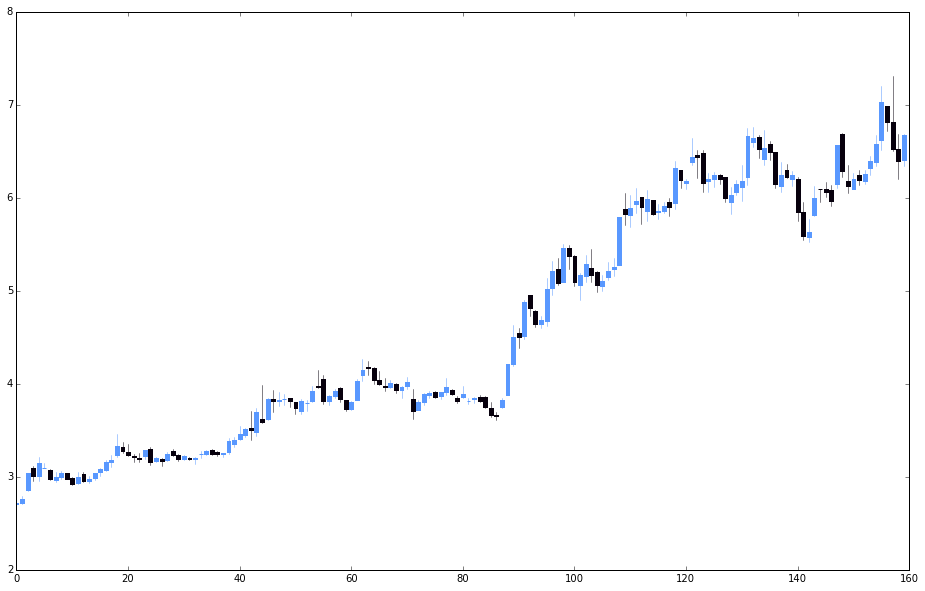

In [70]:
start_time = time.time()

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ochl

bar = ds.fetch('000100','20141001','20150601',output='bar')
quotes = bar.get_candlist()
fig = plt.figure(figsize=(16,10))
ax = plt.subplot(111)
candlestick_ochl(ax, quotes, width=0.7, colorup='#5998ff', colordown='#07000d')
ax.set_xlim([0, len(quotes)])

print 'Finished in',time.time()-start_time,'seconds.'


* Resampler.rspfbar_date(self, rate)

    * 对Bar数据进行再取样。rate＝取样率。
    * 仍在测试中。
    
---

(0, 23)

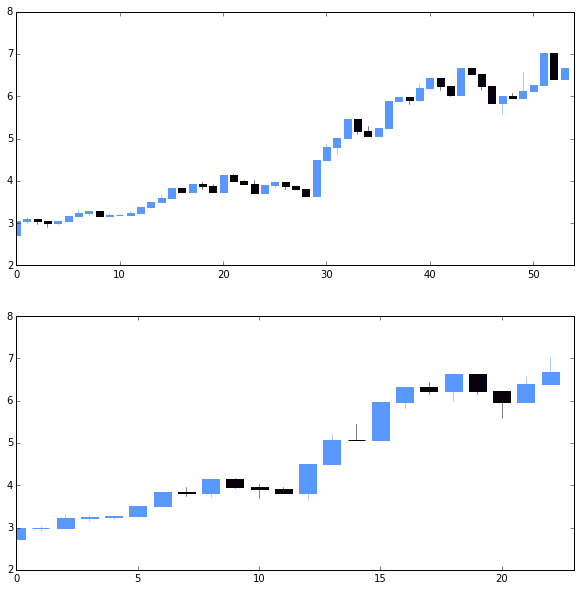

In [83]:
rs = Resampler()
rs.load_bars(bar)
newbar1 = Bar(rs.rspfbar_date(3))
newbar2 = Bar(rs.rspfbar_date(7))

quotes1 = newbar1.get_candlist()
quotes2 = newbar2.get_candlist()
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
candlestick_ochl(ax1, quotes1, width=0.7, colorup='#5998ff', colordown='#07000d')
candlestick_ochl(ax2, quotes2, width=0.7, colorup='#5998ff', colordown='#07000d')
ax1.set_xlim([0, len(quotes1)])
ax2.set_xlim([0, len(quotes2)])